In [26]:
import pandas as pd

data = pd.read_excel('160.xlsx')
data.head()

,Manifest Date,From,To,hora,dia,mes,fecha1,fecha2,fecha3
0,2021-01-04 14:00:00,ES0960,ES0160,14:00:00,4,ene,2021-01-04,2021-01-04,2021-01-04
1,2021-01-04 14:00:00,ES0960,ES0160,14:00:00,4,ene,2021-01-04,2021-01-04,2021-01-04
2,2021-01-04 14:00:00,ES0960,ES0160,14:00:00,4,ene,2021-01-04,2021-01-04,2021-01-04
3,2021-01-04 18:00:00,ES0960,ES0160,18:00:00,4,ene,2021-01-04,2021-01-04,2021-01-04
4,2021-01-04 20:00:00,ES0060,ES0160,20:00:00,4,ene,2021-01-04,2021-01-04,2021-01-04


Nuestro objetivo será el de predecir la variable `Manifest Date` a partir del resto.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72970 entries, 0 to 72969
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Manifest Date  72970 non-null  datetime64[ns]
 1   From           72970 non-null  object        
 2   To             72970 non-null  object        
 3   hora           72970 non-null  object        
 4   dia            65049 non-null  object        
 5   mes            72970 non-null  object        
 6   fecha1         72970 non-null  datetime64[ns]
 7   fecha2         72970 non-null  datetime64[ns]
 8   fecha3         72970 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(5)
memory usage: 5.0+ MB


In [29]:
data['From'].value_counts()


IT0073     47225
PL0032     10889
GB0064      6512
NL0065      3174
ES0060      3162
ES0960      1396
BG0129       299
DE0104       207
DE0066        72
ES0160        14
RO0134         6
CY0044         6
NL0700         6
dHU0103        2
Name: From, dtype: int64

In [30]:
data['Manifest Date'].value_counts()

2021-12-01 23:00:00    856
2021-12-18 23:00:00    823
2021-12-06 23:00:00    782
2021-02-03 23:00:00    668
2021-12-13 23:00:00    654
                      ... 
2021-08-27 16:15:26      1
2021-05-12 19:36:26      1
2021-05-12 18:00:00      1
2021-11-30 13:30:48      1
2021-06-08 09:00:00      1
Name: Manifest Date, Length: 1464, dtype: int64

Como puedes observar tenemos variables continuas, categóricas y algunos *missing values*. Vamos a ver como podemos tratar estos aspectos con `Scikit-Learn`, aunque primero separaremos unas cuantas muestras para entrenar y el resto para evaluar nuestros modelos. Para ello vamos a utilizar la que es la funcionalidad probablemente más utilizada de la librería:

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2) # 20% de los datos para test, 80% para entrenamiento

len(data), len(train), len(test)

(72970, 58376, 14594)

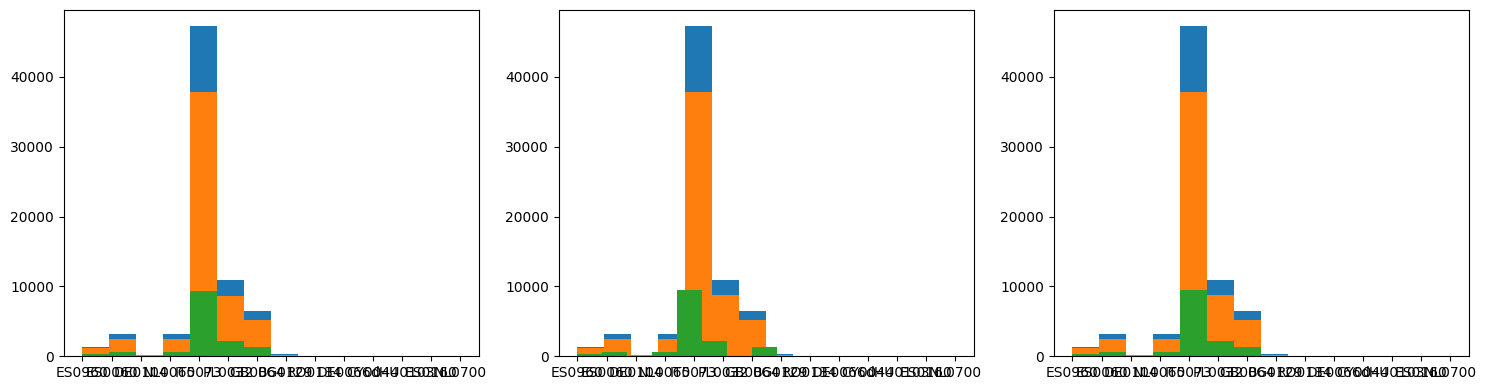

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,4))
ax = plt.subplot(1, 3, 1)
train, test = train_test_split(data, test_size=0.2)
ax.hist(data['From'], bins=len(data['From'].value_counts()))
ax.hist(train['From'], bins=len(data['From'].value_counts()))
ax.hist(test['From'], bins=len(data['From'].value_counts()))
ax = plt.subplot(1, 3, 2)
train, test = train_test_split(data, test_size=0.2, random_state=42) # siempre tendremos el mismo resultado
ax.hist(data['From'], bins=len(data['From'].value_counts()))
ax.hist(train['From'], bins=len(data['From'].value_counts()))
ax.hist(test['From'], bins=len(data['From'].value_counts()))
ax = plt.subplot(1, 3, 3)
train, test = train_test_split(data, test_size=0.2, random_state=69, stratify=data['From']) # balancear
ax.hist(data['From'], bins=len(data['From'].value_counts()))
ax.hist(train['From'], bins=len(data['From'].value_counts()))
ax.hist(test['From'], bins=len(data['From'].value_counts()))
plt.tight_layout()
plt.show()

In [35]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

Para tratar los *missing values* podemos usar un `Imputer`, que puede ser tan sencillo como cambiar los valores inexistentes por el valor promedio de la columna o un valor fijo hasta el uso de algoritmos más complejos que puedes encontrar en la documentación. En este caso solo tenemos una columna con *missing values* (`total_rooms`) de tipo numérico, pero si también tuviésemos *missing values* en variables categóricas deberíamos separarlas ya que querremos usar estrategias diferentes. De hecho, es buena idea separar variables numéricas de categóricas ya que las trataremos de diferente manera.

In [37]:
train_data, y_train = train.drop(['Manifest Date'], axis=1), train['Manifest Date'].copy()
test_data, y_test = test.drop(['Manifest Date'], axis=1), test['Manifest Date'].copy()

train_num = train_data.drop(['From'], axis=1)
train_cat = train_data[['From']]

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # definir imputer
imputer.fit(train_num) # calcular mediana
imputer.statistics_ # valores calculado

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'ES0160'

In [39]:
X_train_num = imputer.transform(train_num) # cambiar valores inexistentes por la mediana

X_train_num

AttributeError: 'SimpleImputer' object has no attribute '_fit_dtype'